In [49]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [50]:
academics_clean = pd.read_csv("academics_clean.csv")
academics_clean

,School Name,SAT Average Overall,% of Students receiving Federal Loan,Title 4 Cost Private,No.of programs offered,Tuition FT Enrollment in $,Enrollment,Highest degree awarded,SAT Writing Midpoint,SAT Math Midpoint,...,Completion Rate 4 year (2 Or More Races),Completion Rate 4 year (Hawaian/Pacific Islander),Completion Rate 4 year (Hispanic),Completion Rate 4 year (Black),Completion Rate 4 year (Asian),Completion Rate 4 year (American Indian),General Completion Rate,id,Latitude,Longitutde
0,Alabama A & M University,954.0,65.52,0.0,0.0,9243.0,0,4,414.0,460.0,...,32.14,0.00,22.22,28.05,0.00,0.00,28.33,100654,34.78,-86.57
1,University of Alabama at Birmingham,1266.0,44.01,0.0,0.0,11678.0,0,4,0.0,644.0,...,50.00,0.00,57.69,55.65,83.54,60.00,61.81,100663,33.51,-86.80
2,University of Alabama in Huntsville,1300.0,35.78,0.0,0.0,8246.0,0,4,0.0,655.0,...,60.00,0.00,64.44,48.45,81.25,66.67,59.25,100706,34.72,-86.64
3,Alabama State University,955.0,76.37,0.0,0.0,8535.0,0,4,0.0,457.0,...,6.25,0.00,42.86,28.44,33.33,0.00,30.15,100724,32.36,-86.30
4,The University of Alabama,1244.0,34.54,0.0,0.0,13731.0,0,4,540.0,610.0,...,66.49,62.50,66.10,56.63,79.12,62.07,72.19,100751,33.21,-87.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Milligan University,1197.0,47.50,126.0,0.0,14211.0,0,4,526.0,551.0,...,100.00,0.00,92.86,83.33,100.00,0.00,67.39,486901,36.30,-82.29
1023,Emory University-Oxford College,1480.0,25.77,225.0,0.0,29055.0,0,2,670.0,760.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,487092,33.62,-83.87
1024,Purdue University Northwest,1098.0,31.67,0.0,0.0,8057.0,0,4,0.0,540.0,...,16.67,0.00,41.38,18.07,57.14,100.00,41.08,490805,41.58,-87.47
1025,The Southwestern Baptist Theological Seminary,1154.0,0.00,0.0,0.0,4515.0,0,4,0.0,560.0,...,0.00,0.00,11.11,25.00,57.14,0.00,29.01,494603,32.68,-97.35


In [51]:
clean_fafsa = pd.read_csv("clean_fafsa.csv")
clean_fafsa

,School Name,SAT Average Overall,City,Carnegie Classification Undergraduate Profile,Carnegie Size Setting,Public Average Net Price,Private Average Net Price,"Avg $75,001-$110,000 (Public)","Avg $75,000+ (Public)","Avg $48,001-$75,000 (Public)",...,"Avg $30,001-$75,000 (Public)","Avg $30,001-$75,000 (All)","Avg $30,001-$48,000 (Public)","Avg $30,001-$48,000 (All)","Avg $110,000+ (Public)","Avg $110,000+ (All)","Avg $0-$48,000 (Public)","Avg $0-$48,000 (Private)","Avg $0-$30,000 (Public)","Avg $0-$30,000 (Private)"
0,Alabama A & M University,954.0,Normal,10,14,13057.0,0.0,16707.0,17399.0,15508.0,...,13424.0,0.0,12300.0,0.0,18857.0,0,12210.0,0.0,12177.0,0.0
1,University of Alabama at Birmingham,1266.0,Birmingham,9,15,16585.0,0.0,18230.0,19441.0,16847.0,...,16038.0,0.0,15370.0,0.0,20054.0,0,14431.0,0.0,13862.0,0.0
2,University of Alabama in Huntsville,1300.0,Huntsville,15,13,17250.0,0.0,19206.0,19333.0,18572.0,...,16919.0,0.0,14646.0,0.0,19423.0,0,14651.0,0.0,14654.0,0.0
3,Alabama State University,955.0,Montgomery,10,14,13593.0,0.0,20568.0,21072.0,13992.0,...,14127.0,0.0,14170.0,0.0,21938.0,0,13180.0,0.0,12877.0,0.0
4,The University of Alabama,1244.0,Tuscaloosa,12,16,21534.0,0.0,23830.0,24553.0,21957.0,...,21041.0,0.0,20121.0,0.0,24948.0,0,18883.0,0.0,18338.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,American College of the Building Arts,1140.0,Charleston,11,6,0.0,28880.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1021,Kennesaw State University,1150.0,Kennesaw,9,15,18212.0,0.0,21005.0,21191.0,19163.0,...,17706.0,0.0,16471.0,0.0,21304.0,0,15961.0,0.0,15631.0,0.0
1022,Milligan University,1197.0,Milligan,12,11,0.0,21913.0,0.0,0.0,0.0,...,0.0,19437.0,0.0,20969.0,0.0,0,0.0,16088.0,0.0,12123.0
1023,Emory University-Oxford College,1480.0,Oxford,4,2,0.0,31883.0,0.0,0.0,0.0,...,0.0,18582.0,0.0,17426.0,0.0,0,0.0,19958.0,0.0,21298.0


In [52]:
demographics_clean = pd.read_csv("demographics_clean.csv")
demographics_clean

,School Name,School_Id,SAT Average Overall,Student Count,"Requirement; 1:Yes, 2:Rec, 3:Na, 4:Dk, 5:Nan",Admission Rate,4Yr Uni Completion Rates,% White Students,% Hispanic Students,% Black Students,% Asian Students,% AIAN Students,% Female Students,% Male Students,School Latitude,School Longitude
0,Alabama A & M University,100654,954.0,5098.0,5.0,71.60,28.07,1.84,1.14,89.78,0.14,0.27,59.40,40.60,34.78,-86.57
1,University of Alabama at Birmingham,100663,1266.0,13284.0,5.0,88.54,62.45,52.97,6.69,24.58,7.67,0.21,62.10,37.90,33.51,-86.80
2,University of Alabama in Huntsville,100706,1300.0,7358.0,1.0,73.67,60.72,71.96,6.10,8.71,3.57,0.80,40.47,59.53,34.72,-86.64
3,Alabama State University,100724,955.0,3495.0,5.0,97.99,28.43,1.52,1.29,92.59,0.20,0.17,64.95,35.05,32.36,-86.30
4,The University of Alabama,100751,1244.0,30725.0,5.0,78.90,72.23,76.76,5.49,10.50,1.37,0.37,56.15,43.85,33.21,-87.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Milligan University,486901,1197.0,770.0,1.0,60.35,70.05,77.40,6.62,4.55,0.91,0.65,50.26,49.74,36.30,-82.29
1023,Emory University-Oxford College,487092,1480.0,1066.0,5.0,19.82,0.00,33.02,10.13,8.44,28.42,0.00,53.19,46.81,33.62,-83.87
1024,Purdue University Northwest,490805,1098.0,6396.0,5.0,76.36,40.28,56.64,23.98,10.30,3.05,0.17,56.86,43.14,41.58,-87.47
1025,The Southwestern Baptist Theological Seminary,494603,1154.0,251.0,5.0,100.00,29.01,57.77,9.16,5.98,7.57,1.20,42.23,57.77,32.68,-97.35


In [53]:
dependency_df = pd.read_csv("dependency_df.csv")
dependency_df

,School Name,SAT Average Overall,"% IndepStudents, LowIncome $0-$30,000",% Independent Students,"% DepStudents, LowIncome $0-$30,000","% aided students family income $0-$30,000",% First Generation Students,"% First Gen, Parents w/College","% First Gen, Parents w/MiddleSchool","% First Gen, Parents w/HighSchool",...,% FirstGenStudents Completed 6 Years,% FirstGenStudents Completed 8 Years,% FirstGenStudents Withdrawn 2 Years,% FirstGenStudents Withdrawn 3 Years,% FirstGenStudents Withdrawn 4 Years,% FirstGenStudents Withdrawn 6 Years,% FirstGenStudents Withdrawn 8 Years,id,Latitude,Longitutde
0,Alabama A & M University,954.0,90.16,9.89,56.91,60.20,36.58,63.42,1.64,34.94,...,29.46,28.54,35.83,31.39,35.08,33.17,27.16,10065400,3478.34,-8656.85
1,University of Alabama at Birmingham,1266.0,59.42,32.14,34.87,42.76,34.12,65.88,2.23,31.90,...,51.47,51.95,21.49,23.98,21.83,18.63,16.68,10066300,3350.57,-8679.93
2,University of Alabama in Huntsville,1300.0,68.89,25.16,26.90,37.46,31.01,68.99,1.98,29.03,...,45.39,46.87,23.89,23.72,27.92,19.34,15.91,10070600,3472.46,-8664.04
3,Alabama State University,955.0,92.19,10.74,57.76,61.46,34.34,65.66,1.88,32.46,...,30.16,26.89,34.32,38.82,33.17,30.93,27.49,10072400,3236.43,-8629.57
4,The University of Alabama,1244.0,60.78,14.30,20.38,26.15,22.57,77.43,0.82,21.76,...,57.32,53.28,13.18,14.35,15.25,14.38,14.89,10075100,3321.19,-8754.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Milligan University,1197.0,55.84,19.35,17.76,25.13,31.87,68.13,0.00,0.00,...,49.70,47.75,0.00,0.00,0.00,0.00,15.73,48690100,3630.01,-8229.41
1023,Emory University-Oxford College,1480.0,68.47,10.78,23.04,27.93,16.39,83.61,2.68,13.70,...,90.35,84.36,2.92,2.64,4.29,3.53,4.85,48709200,3361.91,-8387.11
1024,Purdue University Northwest,1098.0,51.28,39.68,32.55,39.98,43.03,56.97,4.90,38.13,...,39.35,39.71,27.75,26.16,26.18,27.25,21.85,49080500,4158.43,-8747.42
1025,The Southwestern Baptist Theological Seminary,1154.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49460300,3268.17,-9734.82


In [54]:
gender_completion_clean = pd.read_csv("gender_completion_clean.csv")
gender_completion_clean

,School Name,SAT Average Overall,% Male Students Completed within 2yrs,% Male Students Completed within 3yrs,% Male Students Completed within 4yrs,% Male Students Completed within 6yrs,% Male Students Completed within 8yrs,% Male Students Withdrawn by 2yrs,% Male Students Withdrawn by 3yrs,% Male Students Withdrawn by 4yrs,...,% Female Students Completed within 6yrs,% Female Students Completed within 8yrs,% Female Students Withdrawn by 2yrs,% Female Students Withdrawn by 3yrs,% Female Students Withdrawn by 4yrs,% Female Students Withdrawn by 6yrs,% Female Students Withdrawn by 8yrs,School_Id,School Latitude,School Longitude
0,Alabama A & M University,954.0,4.07,8.13,17.64,24.46,25.57,37.35,35.40,42.42,...,35.75,31.80,29.71,25.18,28.76,23.31,19.67,10065400,3478.34,-8656.85
1,University of Alabama at Birmingham,1266.0,13.68,28.87,42.53,50.99,50.36,22.39,26.36,24.80,...,55.81,56.91,18.91,19.29,18.64,15.08,12.32,10066300,3350.57,-8679.93
2,University of Alabama in Huntsville,1300.0,6.24,23.53,34.67,48.11,47.63,21.94,26.34,31.40,...,48.01,51.02,19.80,17.90,23.15,14.54,10.17,10070600,3472.46,-8664.04
3,Alabama State University,955.0,5.45,8.79,19.45,25.00,22.30,39.81,46.44,38.90,...,36.87,32.30,28.43,31.68,27.49,21.69,19.84,10072400,3236.43,-8629.57
4,The University of Alabama,1244.0,10.72,36.70,53.26,58.25,55.64,13.47,15.87,15.95,...,64.64,60.68,9.29,10.02,10.93,9.10,9.08,10075100,3321.19,-8754.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Milligan University,1197.0,0.00,37.93,56.34,40.62,49.45,0.00,13.79,0.00,...,63.69,50.85,0.00,12.60,0.00,7.64,12.99,48690100,3630.01,-8229.41
1023,Emory University-Oxford College,1480.0,30.10,80.41,83.84,86.06,86.02,4.34,3.22,5.79,...,92.06,90.99,2.31,1.38,2.53,2.02,1.80,48709200,3361.91,-8387.11
1024,Purdue University Northwest,1098.0,9.33,21.96,23.94,34.69,37.17,32.72,32.55,31.76,...,43.64,43.22,24.15,21.47,21.66,20.57,15.95,49080500,4158.43,-8747.42
1025,The Southwestern Baptist Theological Seminary,1154.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49460300,3268.17,-9734.82


In [55]:
income_clean = pd.read_csv("income_clean.csv")
income_clean

,School Name,SAT Average Overall,Median Family Income,% of Low Income that completed within 4 years,% of Low Income that completed within 6 years,% of Low Income that completed within 8 years,% of Low Income that withdrew within 2 years,% of Low Income that withdrew within 3 years,% of Low Income that withdrew within 4 years,% of Low Income that withdrew within 6 years,...,% of High Income that completed 6 years,% of High Income that completed 8 years,% of High Income that withdrew within 2 years,% of High Income that withdrew within 3 years,% of High Income that withdrew within 4 years,% of High Income that withdrew within 6 years,% of High Income that withdrew within 8 years,id,Latitude,Longitude
0,Alabama A & M University,954.0,23553.0,19.77,28.30,26.57,34.86,31.94,38.11,32.79,...,34.95,33.00,25.00,18.60,21.23,24.27,23.00,100654,34.78,-86.57
1,University of Alabama at Birmingham,1266.0,34489.0,44.10,47.60,47.75,22.33,24.74,22.51,20.82,...,62.65,63.41,15.11,16.65,17.67,12.96,12.31,100663,33.51,-86.80
2,University of Alabama in Huntsville,1300.0,44787.0,33.21,43.55,44.86,25.52,23.06,28.30,21.88,...,54.58,53.19,16.30,19.14,27.62,18.63,13.83,100706,34.72,-86.64
3,Alabama State University,955.0,22080.0,21.06,29.79,24.35,35.23,40.99,34.55,31.74,...,51.63,42.06,20.22,20.34,19.13,15.03,16.82,100724,32.36,-86.30
4,The University of Alabama,1244.0,66733.0,48.02,50.86,48.33,15.43,17.84,17.64,18.32,...,69.87,69.26,7.56,8.87,9.71,7.54,7.33,100751,33.21,-87.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Milligan University,1197.0,59021.0,53.85,51.25,39.56,0.00,18.33,0.00,0.00,...,58.43,56.52,0.00,0.00,0.00,0.00,17.39,486901,36.30,-82.29
1023,Emory University-Oxford College,1480.0,56041.0,82.15,89.53,85.03,0.00,0.00,6.40,0.00,...,88.83,91.09,2.87,0.00,0.00,0.00,0.00,487092,33.62,-83.87
1024,Purdue University Northwest,1098.0,39335.0,28.87,32.65,31.40,31.02,23.82,26.53,30.09,...,47.38,51.65,25.79,27.02,24.96,20.24,16.87,490805,41.58,-87.47
1025,The Southwestern Baptist Theological Seminary,1154.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,494603,32.68,-97.35


In [56]:
academics_clean.columns

Index(['School Name', 'SAT Average Overall',
       '% of Students receiving Federal Loan', 'Title 4 Cost Private',
       'No.of programs offered', 'Tuition FT Enrollment in $', 'Enrollment',
       'Highest degree awarded', 'SAT Writing Midpoint', 'SAT Math Midpoint',
       'SAT Critical Reading Midpoint', 'ACT Writing Midpoint',
       ' ACT Math Midpoint', 'ACT English Midpoint', 'ACT Cumulative Midpoint',
       'Retention Rate FT', 'Completion Rate 4 year (White)',
       'Completion Rate 4 year (2 Or More Races)',
       'Completion Rate 4 year (Hawaian/Pacific Islander)',
       'Completion Rate 4 year (Hispanic)', 'Completion Rate 4 year (Black)',
       'Completion Rate 4 year (Asian)',
       'Completion Rate 4 year (American Indian)', 'General Completion Rate',
       'id', 'Latitude', 'Longitutde'],
      dtype='object')

The r-squared is: 0.4291901964769551


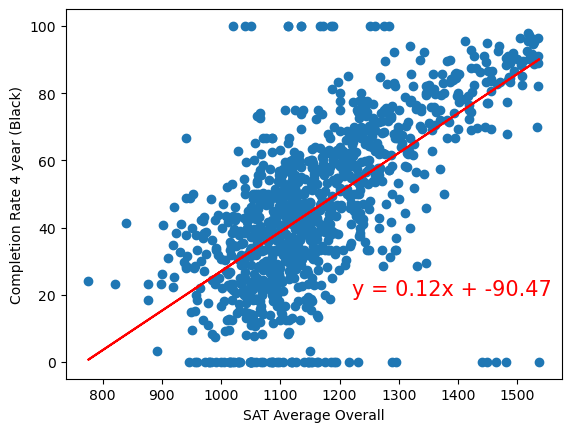

In [89]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = academics_clean['SAT Average Overall']
y_values = academics_clean['Completion Rate 4 year (Black)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1220,20),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Completion Rate 4 year (Black)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.37954494332939


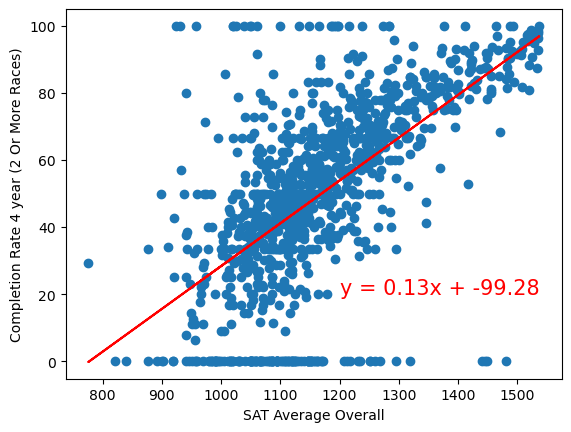

In [114]:
x_values = academics_clean['SAT Average Overall']
y_values = academics_clean['Completion Rate 4 year (2 Or More Races)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1200,20),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Completion Rate 4 year (2 Or More Races)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.07806444245163824


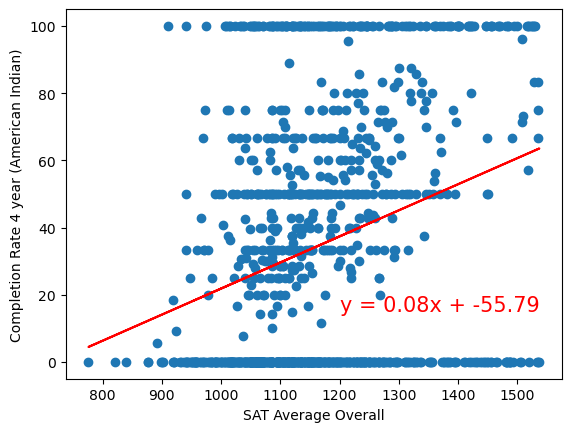

In [91]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = academics_clean['SAT Average Overall']
y_values = academics_clean['Completion Rate 4 year (American Indian)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1200,15),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Completion Rate 4 year (American Indian)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3231686960037612


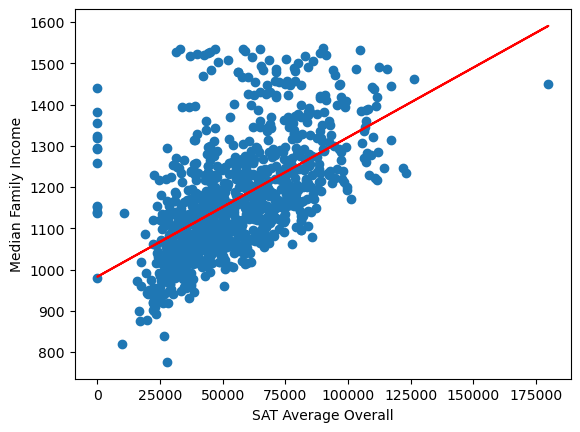

In [131]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = income_clean['Median Family Income']
y_values = income_clean['SAT Average Overall']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(800,150000),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Median Family Income')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.17867510958382085


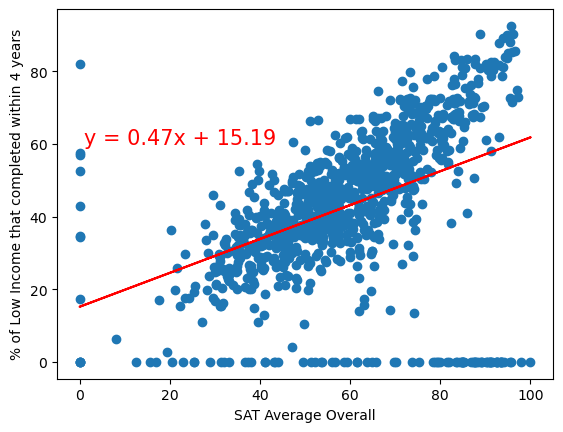

In [111]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = academics_clean['General Completion Rate']
y_values = income_clean['% of Low Income that completed within 4 years']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,60),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('% of Low Income that completed within 4 years')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2229676490467558


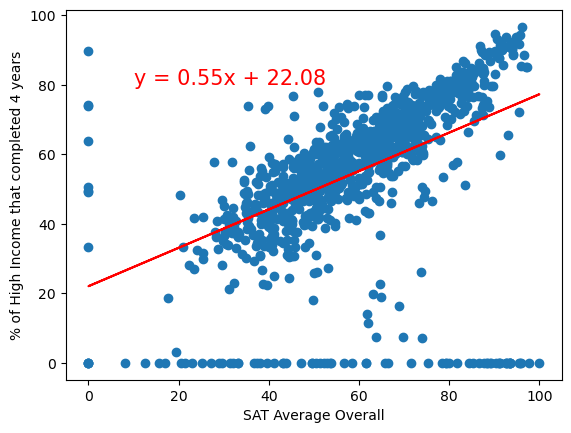

In [105]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = academics_clean['General Completion Rate']
y_values = income_clean['% of High Income that completed 4 years']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,80),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('% of High Income that completed 4 years')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.29708253741131385


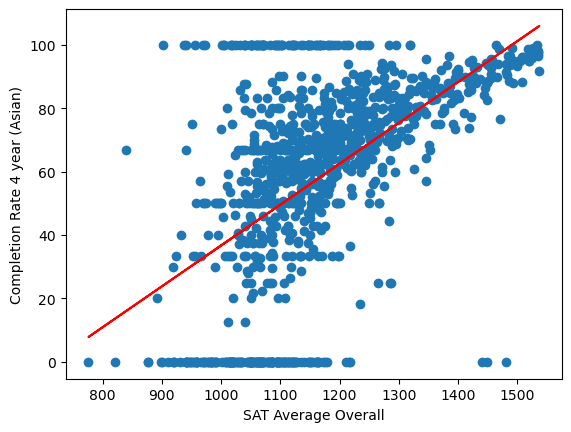

In [130]:
x_values = academics_clean['SAT Average Overall']
y_values = academics_clean['Completion Rate 4 year (Asian)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,60),fontsize=15,color="red")
plt.xlabel('SAT Average Overall')
plt.ylabel('Completion Rate 4 year (Asian)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [94]:
income_clean.columns

Index(['School Name', 'SAT Average Overall', 'Median Family Income',
       '% of Low Income that completed within 4 years',
       '% of Low Income that completed within 6 years',
       '% of Low Income that completed within 8 years',
       '% of Low Income that withdrew within 2 years',
       '% of Low Income that withdrew within 3 years',
       '% of Low Income that withdrew within 4 years',
       '% of Low Income that withdrew within 6 years',
       '% of Low Income that withdrew within 8 years',
       '% of Middle Income that completed within 3 years',
       '% of Middle Income that completed within 4 years',
       '% of Middle Income that completed within 6 years',
       '% of Middle Income that completed within 8 years',
       '% of Middle Income that withdrew within 2 years',
       '% of Middle Income that withdrew within 3 years',
       '% of Middle Income that withdrew within 4 years',
       '% of Middle Income that withdrew within 6 years',
       '% of Middle 

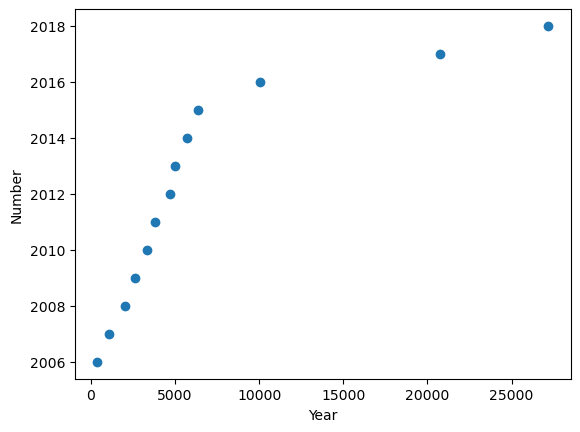

In [22]:
# Generate a scatter plot of year versus number of petrol-electric cars
x_values = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & 
                            (vehicle_data['engine'] == 'Petrol-Electric'), 
                             'number']
y_values = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & 
                            (vehicle_data['engine'] == 'Petrol-Electric'), 
                             'year']
plt.scatter(x_values,y_values)
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

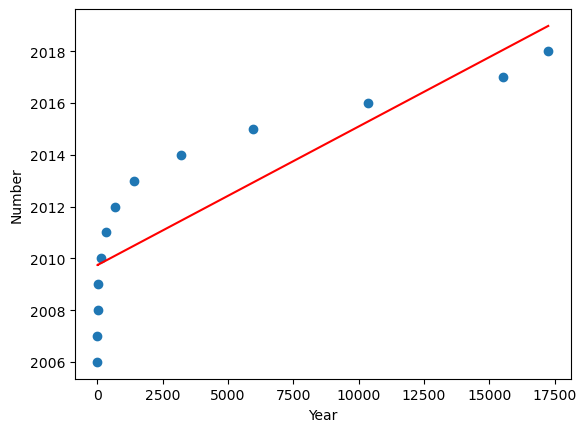

In [27]:
# Perform a linear regression on year versus petrol-electric cars
# Create equation of line to calculate predicted number of petrol-electric cars
# Plot the linear model on top of scatter plot 

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

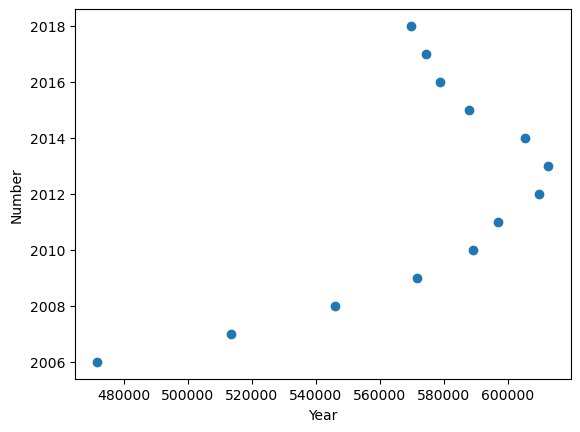

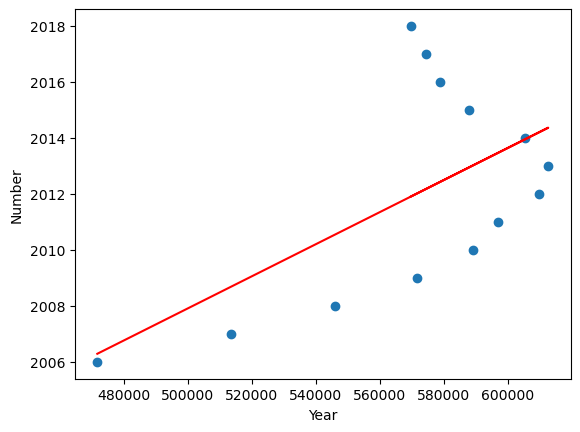

In [28]:
# Repeat plotting scatter and linear model for petrol cars versus year
x_values = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & 
                            (vehicle_data['engine'] == 'Petrol'), 
                             'number']
y_values = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & 
                            (vehicle_data['engine'] == 'Petrol'), 
                             'year']
plt.scatter(x_values,y_values)
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

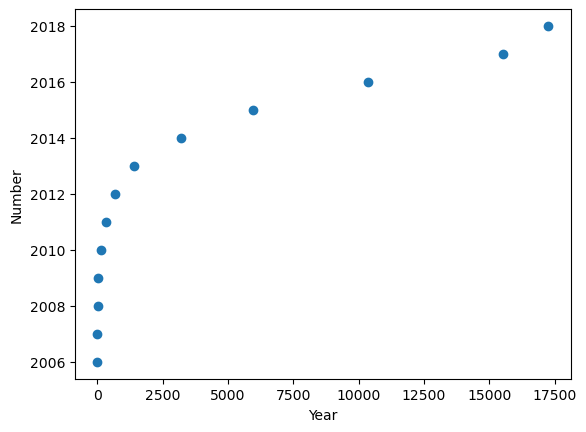

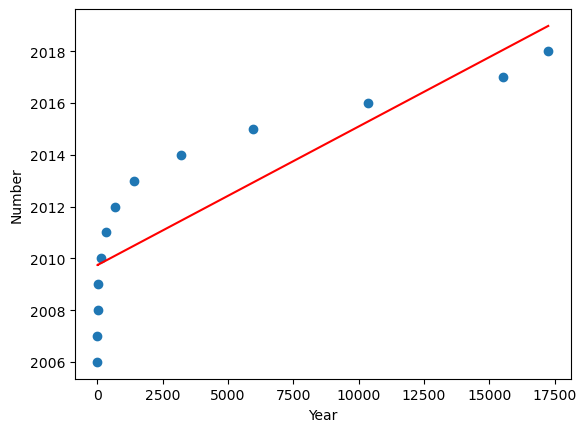

In [29]:
# Repeat plotting scatter and linear model for diesel cars versus year
x_values = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & 
                            (vehicle_data['engine'] == 'Diesel'), 
                             'number']
y_values = vehicle_data.loc[(vehicle_data['type'] == 'Cars') & 
                            (vehicle_data['engine'] == 'Diesel'), 
                             'year']
plt.scatter(x_values,y_values)
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

In [ ]:
# Generate a facet plot of all 3 figures


In [ ]:
# Calculate the number of cars for 2024
